## Time Machine Therapy
Mental health is an onion. You try to peel one layer and then you get greeted by an another layer. It almost seems like a never ending cycle of layers as you peel one after another--tear after tears. For many, this onion is actually peelable. We all get hit with those hard negative thoughts, and majority of us eventually we get through the baby onion and reach the bulb. But for others, their onions are Hulk-sized--GMO mutants--that really stings with each peel. And because of all these layers, they become hopeless. But there are always a solution to a problem, and one that you might not have realized in the palms of your hands. Within our smartphones, there is an app that we mindlessly tap on and launch almost every day. Hint: it is not the latest, hottest social media platform like TikTok. It's Spotify. 

Music to the ears can actually be a therapy for those who are seeking a more independent route to recovery and to cope with their mental health. Everyone has their own way of coping and not everyone wants to reach out to others to help them get through the onion on their palms. And that is ok. There has been concurrent research performed (over the past two decades) to support this claim, and many studies have shown that music can be therapeutic to various mental health conditions such as depression, trauma, and anxiety. And because a lot of the more severe mental health disorders tend to stem from either one of these three, music can be used to address these early on. 

Because music aid in processing emotions, trauma, and a regulating anxiety, this project was created with the intention of going back in time to the "good o' days" and help you utilize a subscription that you maybe paying for to the fullest. The script below uses three main packages: spotipy, bs4, and requests. Requests is used to connect to Billboards website with the date you have specified. Spotipy is used to authenticate your Spotify account credentials and ultimately create the playlist for you. And finally, bs4 is used to web scrape after connecting to the API. bs4 and spotipy does most of the heavy lifting after you specify the date that you want to travel back in time to, and the codes below will automatically create a playlist for you. 

Note: In order to be able to automatically create this playlist, settings within the account must be changed for developer mode (to receive the client_id and client_secret, and have the redirected url in place).

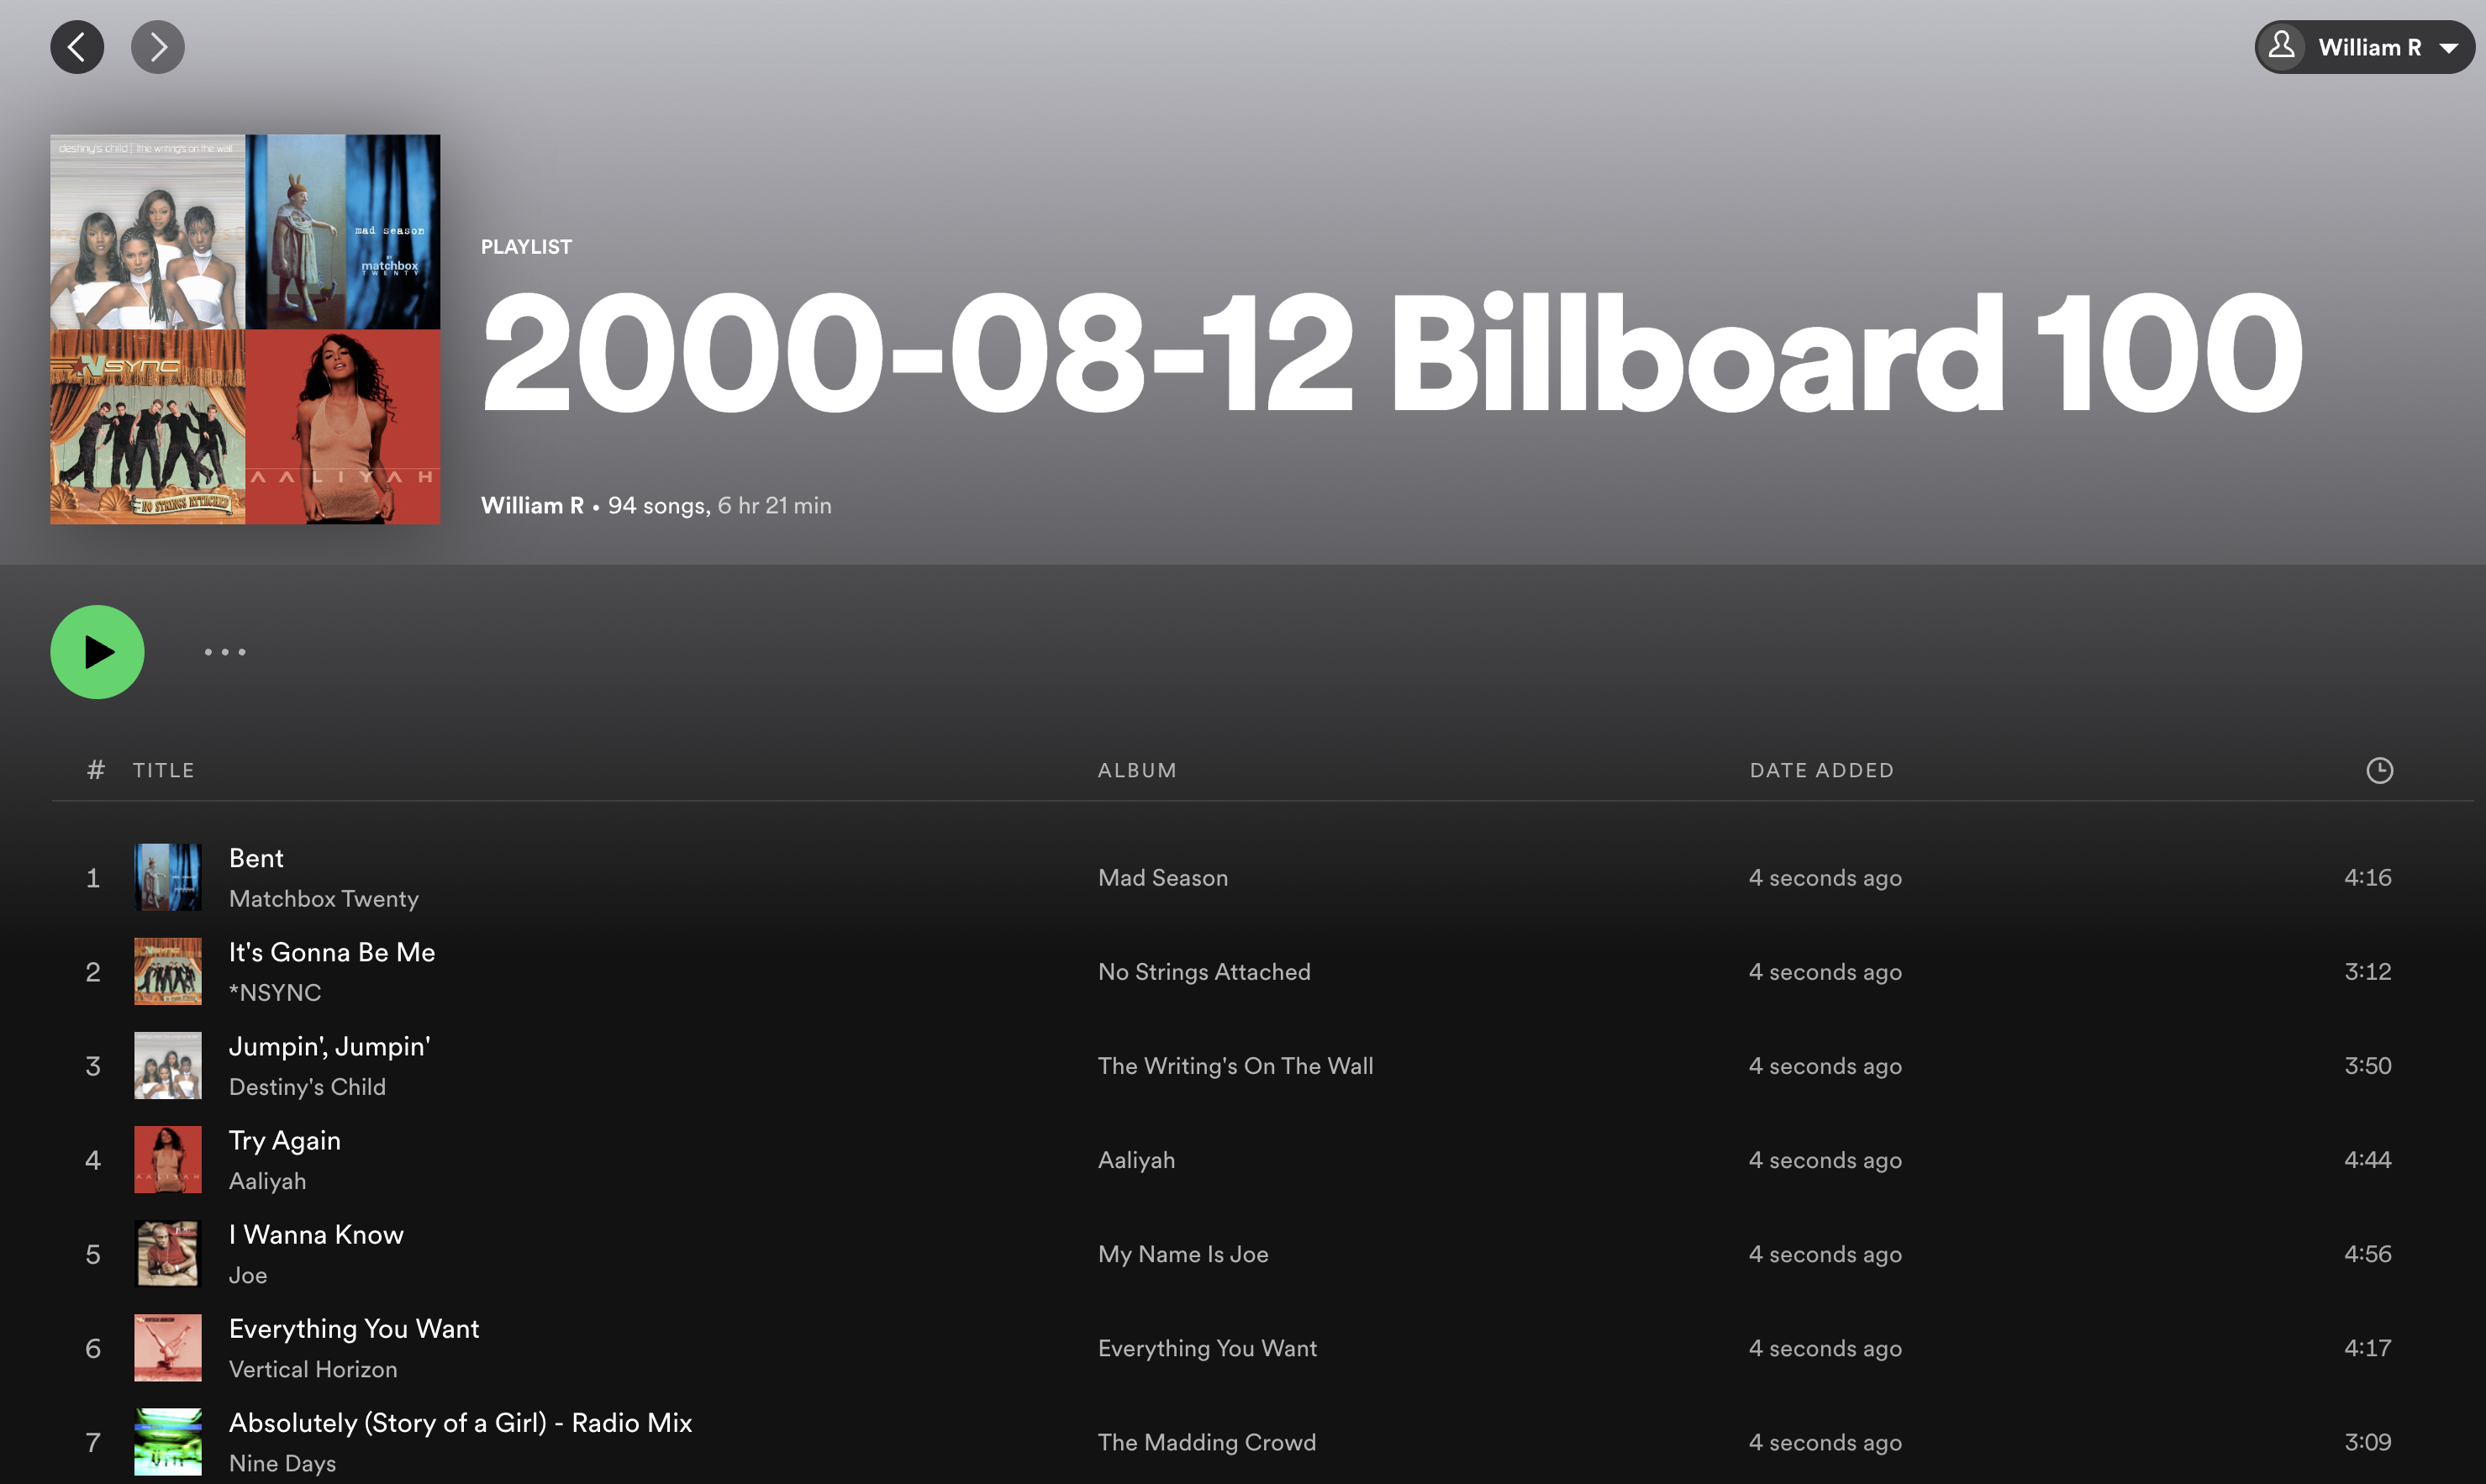

In [3]:
from IPython.display import Image
Image(filename='/Users/William/Desktop/spotify_sample_playlist.png') 

In [ ]:
import requests
from bs4 import BeautifulSoup
import os 
from dotenv import load_dotenv
import spotipy 
from spotipy.oauth2 import SpotifyOAuth

load_dotenv('/Users/William/Desktop/creds.env')
ID = os.getenv('spotify_client_id')
SECRET = os.getenv('spotify_client_secret')

class_name ="c-title a-no-trucate a-font-primary-bold-s u-letter-spacing-0021 lrv-u-font-size-18@tablet lrv-u-font-size-16 u-line-height-125 u-line-height-normal@mobile-max a-truncate-ellipsis u-max-width-330 u-max-width-230@tablet-only"
date = '2000-08-12'
# date = input('What date would you ike to travel back in time to? Please enter in YYYY-MM-DD format! ')

response = requests.get("https://www.billboard.com/charts/hot-100/" + date)

soup = BeautifulSoup(response.text, 'html.parser')
song_names_spans = soup.find_all("h3", id="title-of-a-story", class_=class_name)
song_names = [song.getText().strip('\n') for song in song_names_spans]


sp = spotipy.Spotify(
    auth_manager=SpotifyOAuth(
        scope="playlist-modify-private",
        client_id=ID,
        client_secret=SECRET,
        redirect_uri="https://example.com/callback/",
        show_dialog=True,
        cache_path="token.txt"
    )
)
user_id = sp.current_user()["id"]

song_uris = []
# year = date.split("-")[0]
target_year = int(date.split("-")[0])
year = str(f"{target_year - 1}-{target_year + 1}")

for song in song_names:
    result = sp.search(q=f"track:{song} year:{year}", type="track")
    try:
        uri = result["tracks"]["items"][0]["uri"]
        song_uris.append(uri)
    except IndexError:
        print(f"{song} doesn't exist in Spotify. Skipped.")

playlist = sp.user_playlist_create(user=user_id, name=f"{date} Billboard 100", collaborative=False,public=False)

sp.playlist_add_items(playlist_id=playlist["id"], items=song_uris)
